# Data Information

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
file_path = 'dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- 特徴量(カラム)詳細

| 特徴量            | 説明                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| customerID         | 顧客固有のID                                                        |
| gender             | 性別（男性、女性）                                                      |
| SeniorCitizen      | 高齢者かどうか (1=はい、 0=いいえ)                             |
| Partner            | パートナーの有無 (はい、いいえ)                                |
| Dependents         | 扶養家族の有無 (はい、いいえ)                               |
| tenure             | 在籍期間(月)                   |
| PhoneService       | 電話サービスの有無 (はい、いいえ)                            |
| MultipleLines      | 複数回線の有無 (はい、いいえ、電話サービスなし)         |
| InternetService    | インターネット・サービス・プロバイダー (DSL、光ファイバー、いいえ)                 |
| OnlineSecurity     | オンライン・セキュリティの有無 (はい、いいえ、インターネット サービスなし)      |
| OnlineBackup       | オンライン・バックアップの有無 (はい、いいえ、インターネット サービスなし)        |
| DeviceProtection   | デバイス保護機能の有無 (はい、いいえ、インターネット サービスなし)    |
| TechSupport        | テクニカル・サポートの有無 (はい、いいえ、インターネット サービスなし)|
| StreamingTV        | ストリーミングTVサービスの有無 (はい、いいえ、インターネット サービスなし) |
| StreamingMovies    | ストリーミング映画サービスの有無 (はい、いいえ、インターネット サービスなし) |
| Contract           | 契約形態 (月単位、1年単位、2年単位)      |
| PaperlessBilling   | ペーパーレス請求の有無 (はい、いいえ)                        |
| PaymentMethod      | お支払い方法 (電子小切手、郵送小切手、銀行振込(自動)、クレジットカード(自動)) |
| MonthlyCharges     | 月額料金(ドル)                                  |
| TotalCharges       | 総支払額(ドル)                                    |
| Churn              | 解約の有無 (はい、いいえ)                                      |

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


- 「SeniorCitizen(高齢者かどうか)」がその他のカテゴリ特徴量と違い、0と1で表記されている

In [10]:
data.describe(include=['O']).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


- 数値であるべき「TotalCharges(総支払額)」が文字列型になっている

In [11]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


- 1869人が解約している

In [12]:
1869 / (5174 + 1869)

0.2653698707936959

- 解約者が約27%、非解約者が約73%となっており、データの不均衡を示している

# Data Cleaning

In [13]:
# Convert 'TotalCharges' column to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


- 「TotalCharges(総支払額)」に11個の欠損値がある

In [14]:
# Fill in with median value
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [15]:
# Drop 'customerID' column as it is irrelevant information for the model
data = data.drop(columns=['customerID'])

In [16]:
# Convert 'SeniorCitizen' to categorical feature
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.00,2281.92,2265.27,18.80,402.23,1397.47,3786.60,8684.80


In [20]:
data.describe(include=['O']).T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# Exploratory Data Analysis(EDA)

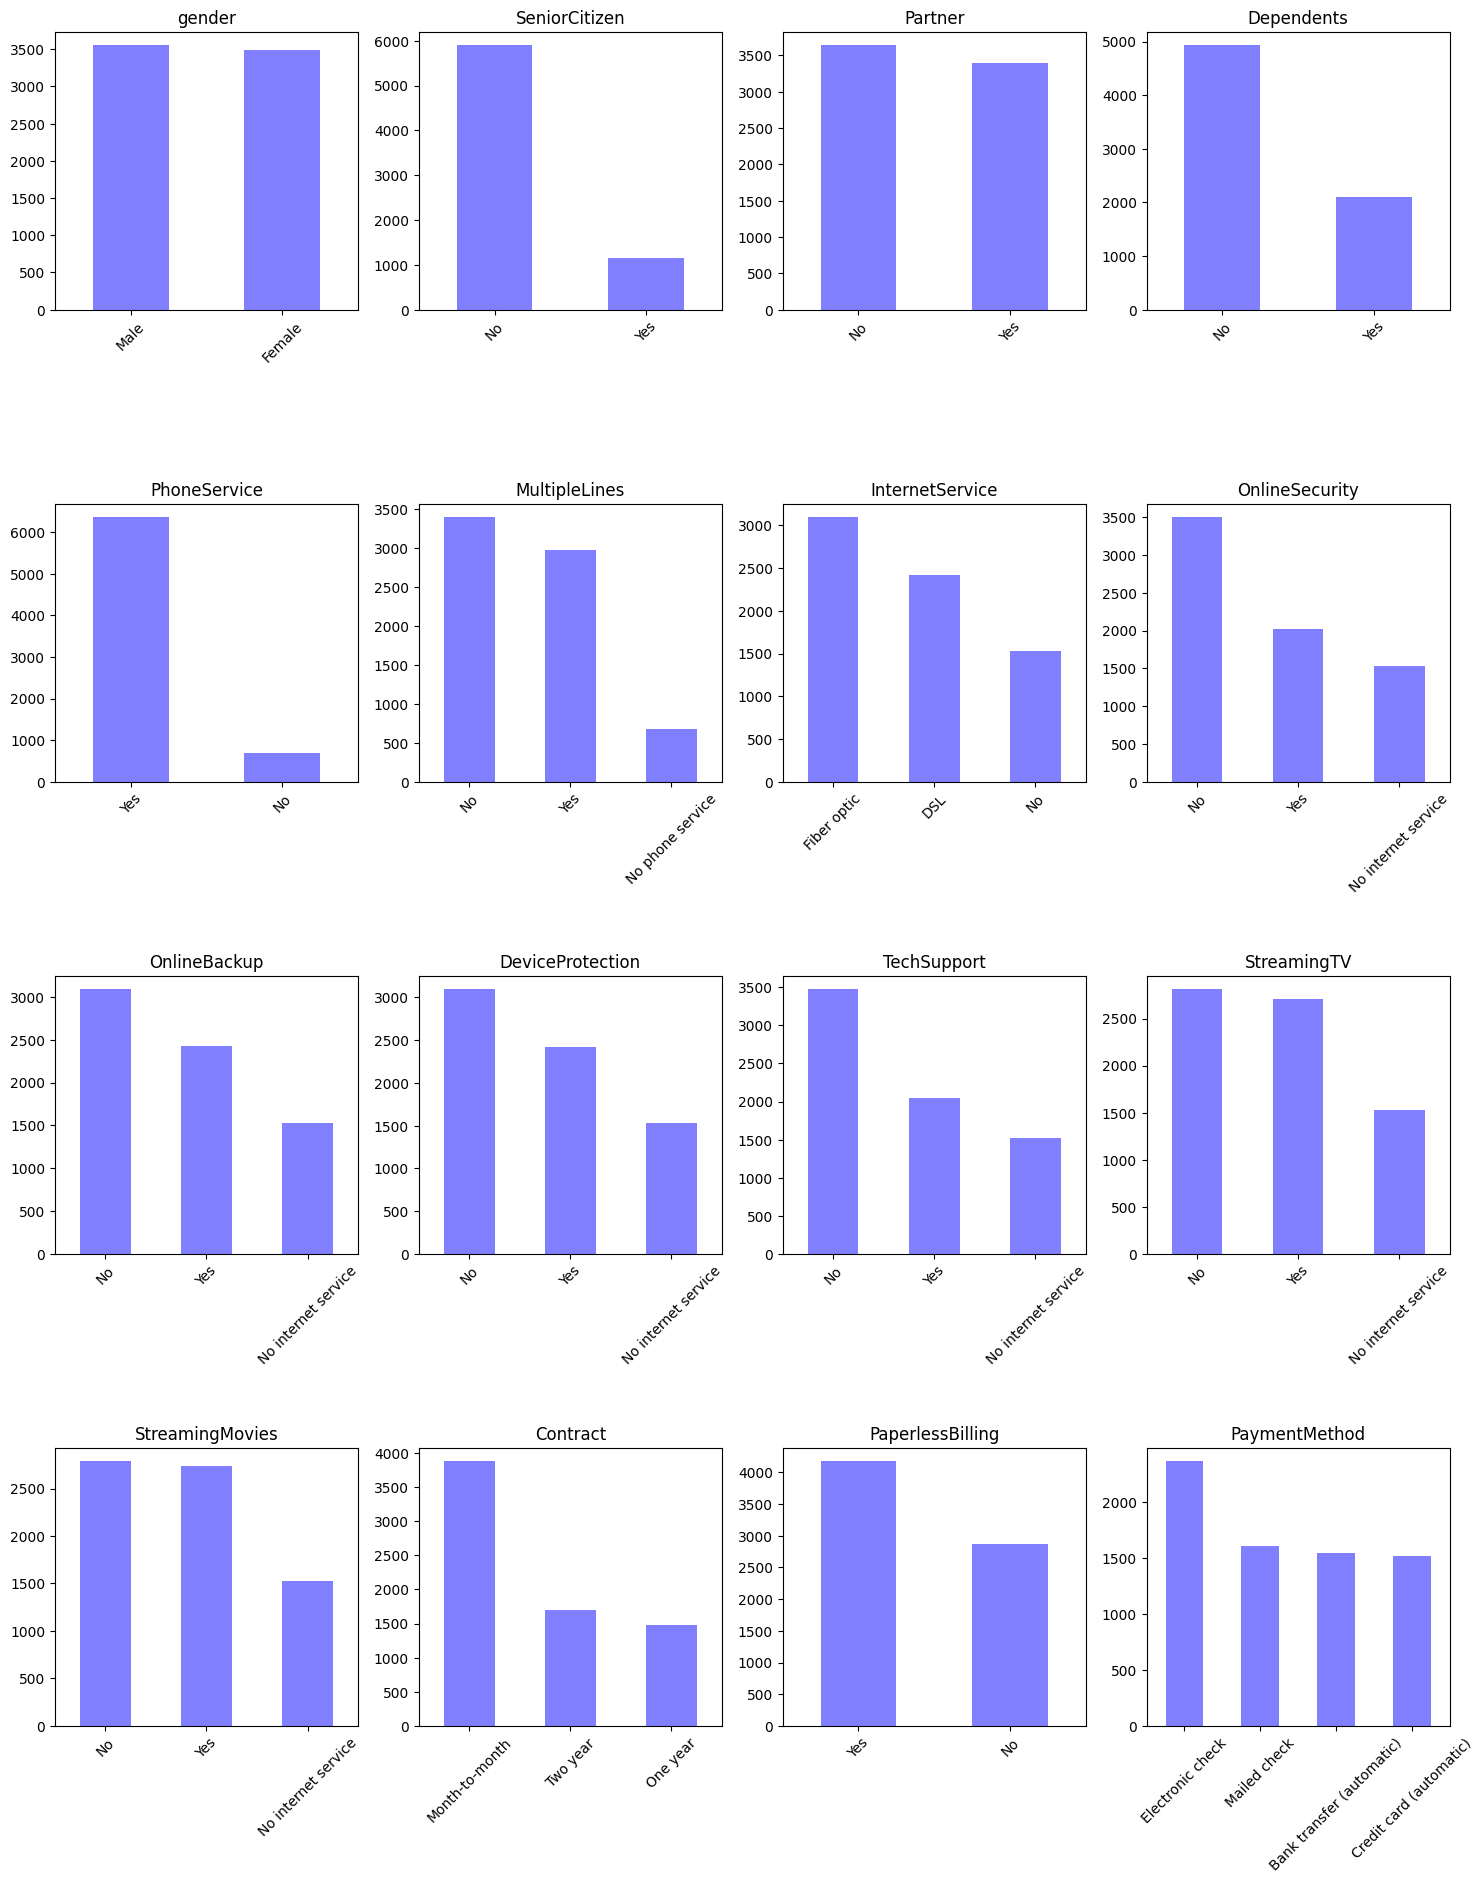

In [21]:
# Look at distributions of categorical features

categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 22))

for i, categorical_feature in enumerate(categorical_features):
    row, col = divmod(i, COLS)

    data[categorical_feature].value_counts().plot(
        kind='bar', width=0.5, ax=ax[row, col], color='blue', alpha=0.5
    )

    ax[row, col].set_title(categorical_feature, fontsize=12)
    ax[row, col].set_xlabel('')
    ax[row, col].tick_params(axis='x', rotation=45)

fig.subplots_adjust(hspace=0.7)
plt.show()

- 男女のユーザーの割合は同じぐらい
- シニアのユーザーは少なく、若年層のユーザーが多い
- 扶養家族がいるユーザーは少ない
- ほとんどのユーザーが電話サービスを利用している
- 「Contract(契約形態)」は月単位のユーザーが多く、1年単位と2年単位のユーザーは同じぐらい
- ペーパーレス請求を利用しているユーザーの方が多い
- 「PaymentMethod(お支払い方法)」では電子小切手利用者が最も多く、郵送小切手、銀行振込、クレジットカードの利用者は同じぐらい

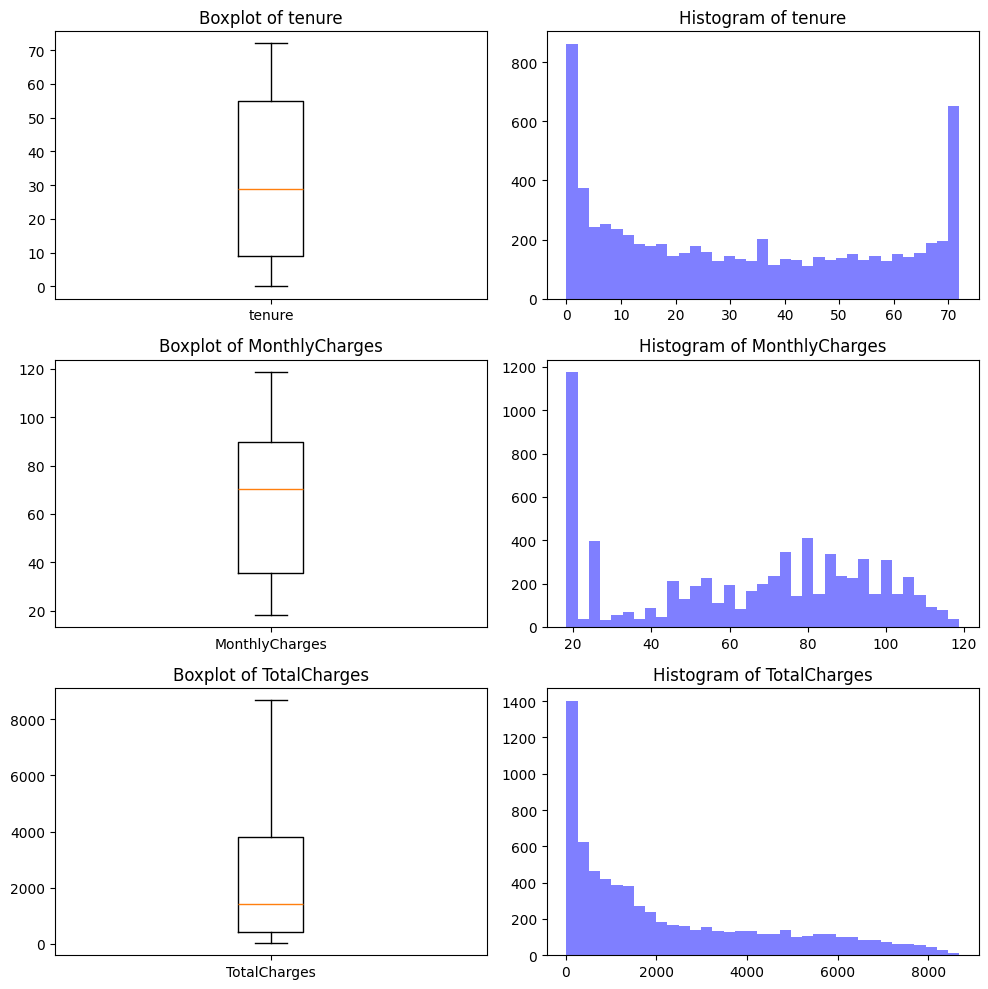

In [22]:
# Look at distributions of numerical features

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
titles = ['Boxplot of {}', 'Histogram of {}']

plt.figure(figsize=(10, 10))

for i, numerical_feature in enumerate(numerical_features):
    # Plot boxplot
    plt.subplot(3, 2, 2 * i + 1)
    plt.boxplot(data[numerical_feature], vert=True)
    plt.xticks([1], [numerical_feature])
    plt.title(titles[0].format(numerical_feature))

    # Plot histogram
    plt.subplot(3, 2, 2 * i + 2)
    plt.hist(data[numerical_feature], bins=35, color='blue', alpha=0.5)
    plt.title(titles[1].format(numerical_feature))

plt.tight_layout()
plt.show()

- 「tenure(在籍期間)」は、0ヶ月〜2ヶ月と70ヶ月〜72ヶ月のユーザーが多い
- 「MonthlyCharges(月額料金)」は、20ドル前後のユーザーが最も多い
- 「TotalCharges(総支払額)」は、0〜500ドルぐらいまでのユーザーが多い
- 異常な値は見られなかった

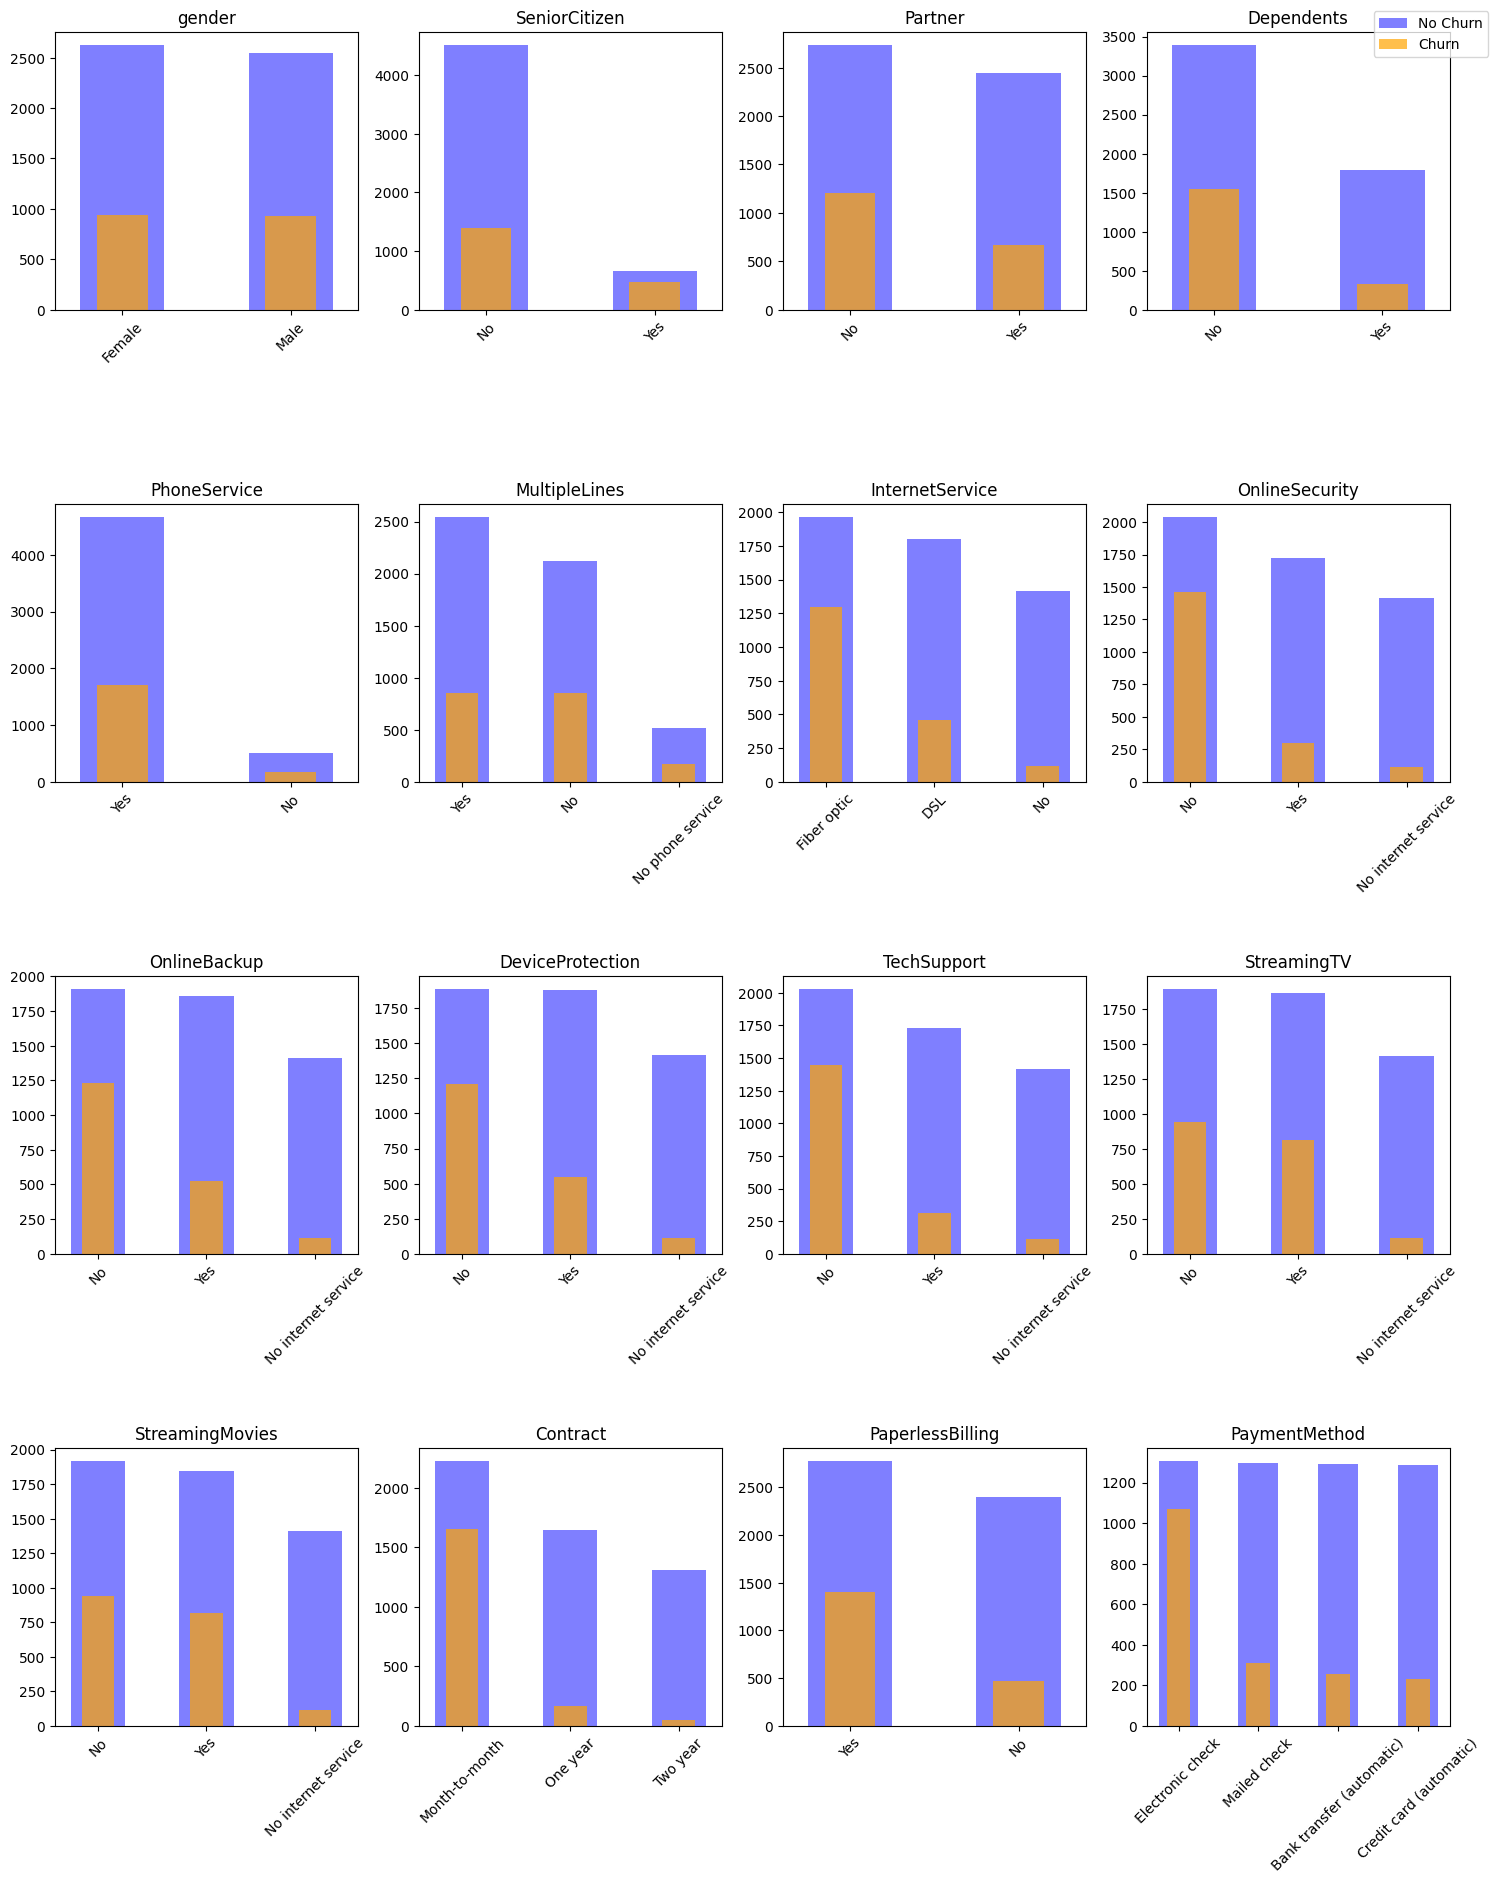

In [23]:
# Look at distributions of categorical features in relation to the target variable

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 22))

for i, categorical_feature in enumerate(categorical_features):
    row, col = divmod(i, COLS)

    data[data.Churn == 'No'][categorical_feature].value_counts().plot(
        kind='bar', width=0.5, ax=ax[row, col], color='blue', alpha=0.5, label='No Churn'
    )

    data[data.Churn == 'Yes'][categorical_feature].value_counts().plot(
        kind='bar', width=0.3, ax=ax[row, col], color='orange', alpha=0.7, label='Churn'
    )

    ax[row, col].set_title(categorical_feature, fontsize=12)
    ax[row, col].set_xlabel('')
    ax[row, col].tick_params(axis='x', rotation=45)

plt.legend(['No Churn', 'Churn'], loc='upper right', bbox_to_anchor=(1.15, 6.2))
fig.subplots_adjust(hspace=0.7)
plt.show()

- シニアユーザーの解約率がかなり高い
- 扶養家族がいないユーザーの解約率が高い
- 「InternetService(インターネット・サービス・プロバイダー)」では、光ファイバー利用者の解約率がかなり高い
- 「OnlineSecurity(オンライン・セキュリティの有無)」、「OnlineBackup(オンライン・バックアップの有無)」、「DeviceProtection(デバイス保護機能の有無)」、「TechSupport(テクニカル・サポートの有無)」などのサービスを利用していないユーザーの解約率がかなり高い
- 「Contract(契約形態)」は月単位のユーザーの解約率がかなり高い
- ペーパーレス請求を利用しているユーザーの解約率が高い
- 「PaymentMethod(お支払い方法)」では電子小切手利用者の解約率がかなり高い

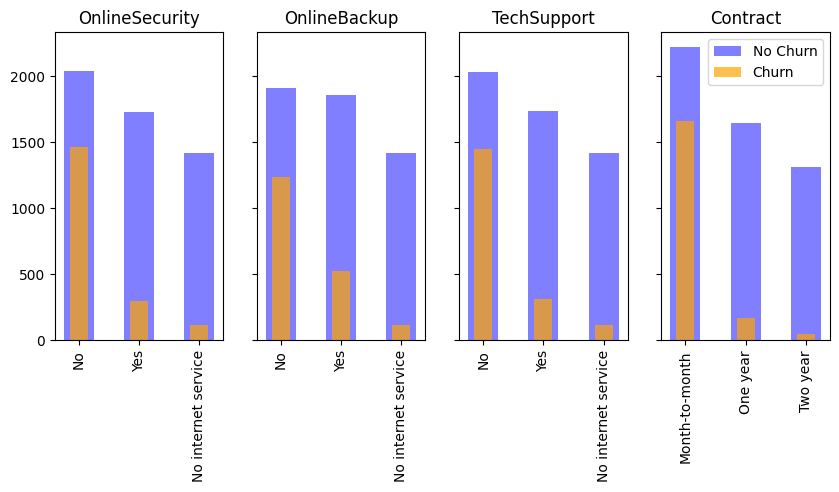

In [24]:
# Plot a few graphs of categorical features in large-size

features = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract']

fig, ax = plt.subplots(1, 4, figsize=(10, 4), sharey=True)

for i, feature in enumerate(features):
    data[data.Churn == 'No'][feature].value_counts().plot(
        kind='bar', width=0.5, ax=ax[i], color='blue', alpha=0.5, label='No Churn'
    )

    data[data.Churn == 'Yes'][feature].value_counts().plot(
        kind='bar', width=0.3, ax=ax[i], color='orange', alpha=0.7, label='Churn'
    )

    ax[i].set_title(feature, fontsize=12)
    ax[i].set_xlabel('')

plt.legend(['No Churn', 'Churn'])
plt.show()

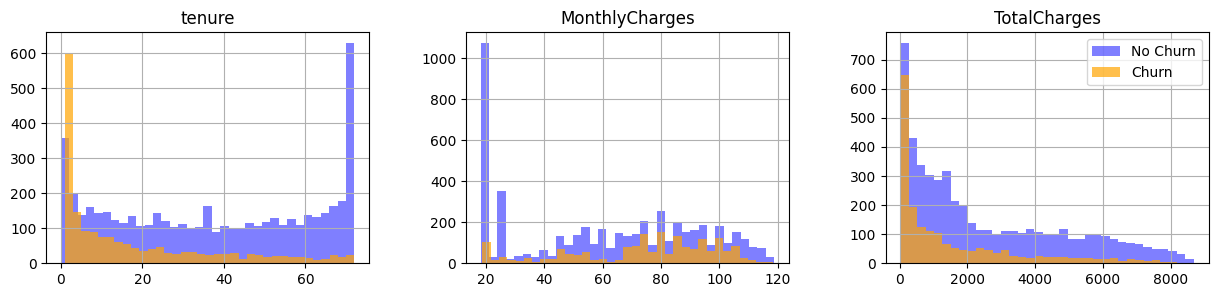

In [25]:
# Look at distributions of numerical features in relation to the target variable

fig, ax = plt.subplots(1, 3, figsize=(15, 3))

data[data.Churn == 'No'][numerical_features].hist(
    bins=35, color='blue', alpha=0.5, ax=ax, label='No Churn'
)

data[data.Churn == 'Yes'][numerical_features].hist(
    bins=35, color='orange', alpha=0.7, ax=ax, label='Churn'
)

plt.legend(['No Churn', 'Churn'])
plt.show()

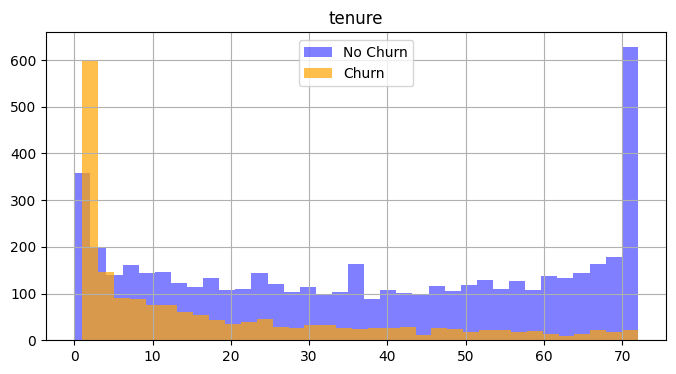

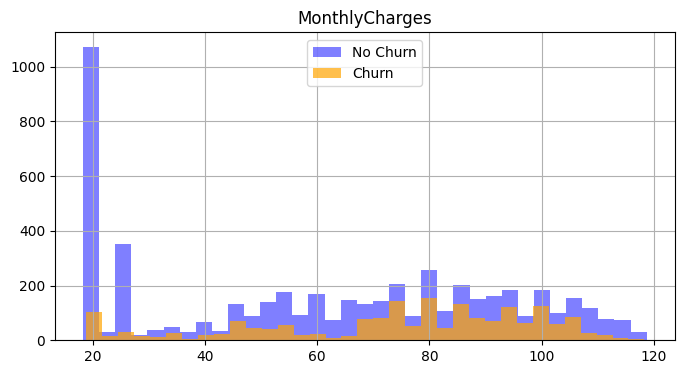

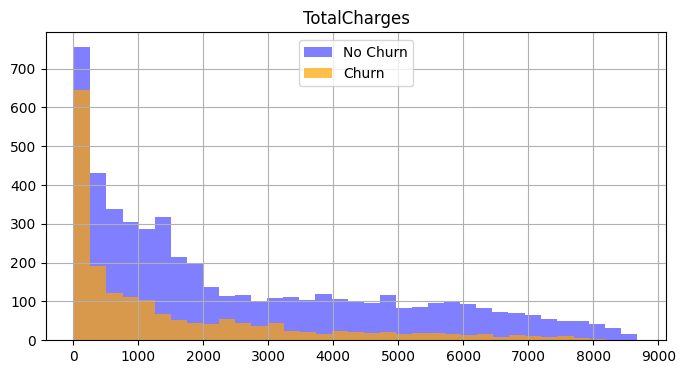

In [26]:
# Plot a few graphs of numerical features in large-size

for numerical_feature in numerical_features:
    fig, ax = plt.subplots(figsize=(8, 4))

    data[data.Churn == 'No'][numerical_feature].hist(
        bins=35, color='blue', alpha=0.5, ax=ax, label='No Churn'
    )

    data[data.Churn == 'Yes'][numerical_feature].hist(
        bins=35, color='orange', alpha=0.7, ax=ax, label='Churn'
    )

    plt.title(numerical_feature)
    plt.legend(['No Churn', 'Churn'], loc='center', bbox_to_anchor=(0.5, 0.9))

    if numerical_feature == 'TotalCharges':
        x_ticks = range(0, 10000, 1000)
        plt.xticks(x_ticks)

    plt.show()

- 「tenure(在籍期間)」では、1ヶ月〜2ヶ月の解約者が最も多い。この解約の多さは4ヶ月程続く。在籍期間が長くなるにつれて、ユーザーの解約は減少する
- 「MonthlyCharges(月額料金)」では、70ドル～105ドルのユーザーの解約率が高い
- 「TotalCharges(総支払額)」が500ドル以下の場合、非常に多くのユーザーが解約している

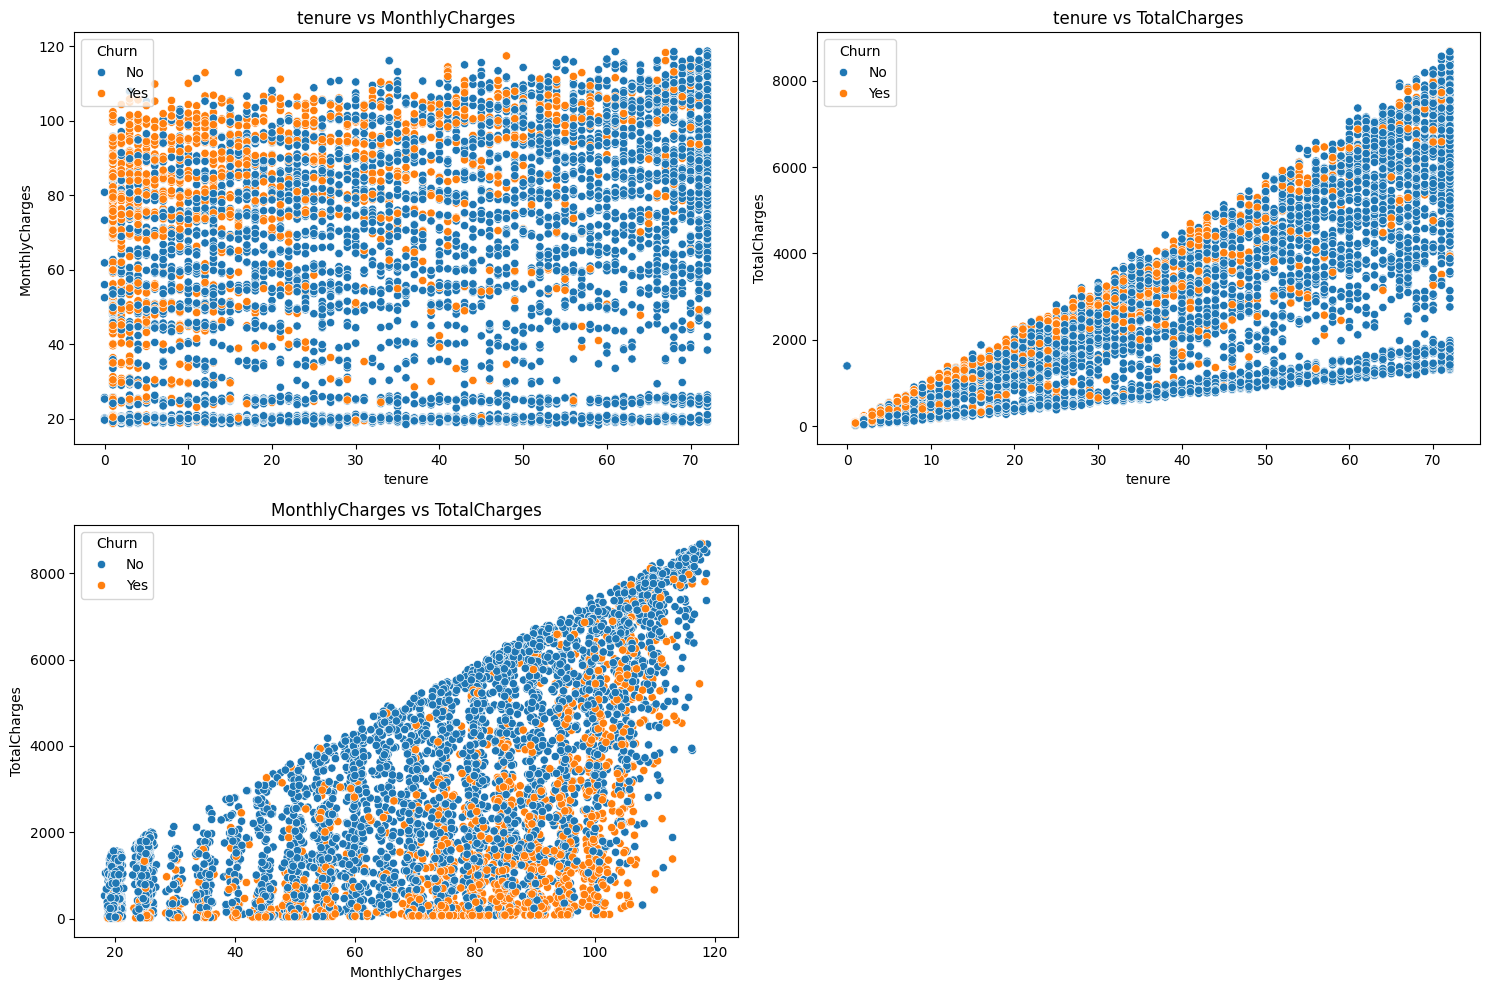

In [27]:
# Plot scatter plots of numerical features

plt.figure(figsize=(15, 10))

plot_number = 1
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        plt.subplot(2, 2, plot_number)

        sns.scatterplot(
            data=data,
            x=numerical_features[i],
            y=numerical_features[j],
            hue='Churn'
        )

        plt.title(f'{numerical_features[i]} vs {numerical_features[j]}')
        plot_number += 1

plt.tight_layout()
plt.show()

- 「tenure(在籍期間)」vs「MonthlyCharges(月額料金)」の0ヶ月から20ヶ月の在籍期間では、どの月額料金の値でもユーザーの解約はかなり進んでいる。在籍期間が20ヶ月から60ヶ月の場合、月額料金が70ドルから120ドルのユーザーが解約している
- 「tenure(在籍期間)」vs「TotalCharges(総支払額)」では、解約するユーザーのほとんどが在籍期間の中で最も高い総支払額を請求されている

# Encoding Categorical Features

In [28]:
# Perform label encoding transformation on categorical features

from sklearn.preprocessing import LabelEncoder

categorical_features_with_target = [
    col for col in data.columns if col not in data.describe().columns
]

df1 = data.copy(deep=True)

le = LabelEncoder()

print('Label Encoder Transformation')
for feature in categorical_features_with_target:
    df1[feature] = le.fit_transform(df1[feature])
    unique_values = df1[feature].unique()
    inv_values = le.inverse_transform(unique_values)

    print(f'{feature}: {unique_values} = {inv_values}')

Label Encoder Transformation
gender: [0 1] = ['Female' 'Male']
SeniorCitizen: [0 1] = ['No' 'Yes']
Partner: [1 0] = ['Yes' 'No']
Dependents: [0 1] = ['No' 'Yes']
PhoneService: [0 1] = ['No' 'Yes']
MultipleLines: [1 0 2] = ['No phone service' 'No' 'Yes']
InternetService: [0 1 2] = ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 2 1] = ['No' 'Yes' 'No internet service']
OnlineBackup: [2 0 1] = ['Yes' 'No' 'No internet service']
DeviceProtection: [0 2 1] = ['No' 'Yes' 'No internet service']
TechSupport: [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingTV: [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingMovies: [0 2 1] = ['No' 'Yes' 'No internet service']
Contract: [0 1 2] = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0] = ['Yes' 'No']
PaymentMethod: [2 3 0 1] = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: [0 1] = ['No' 'Yes']


In [29]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


# Feature Engineering

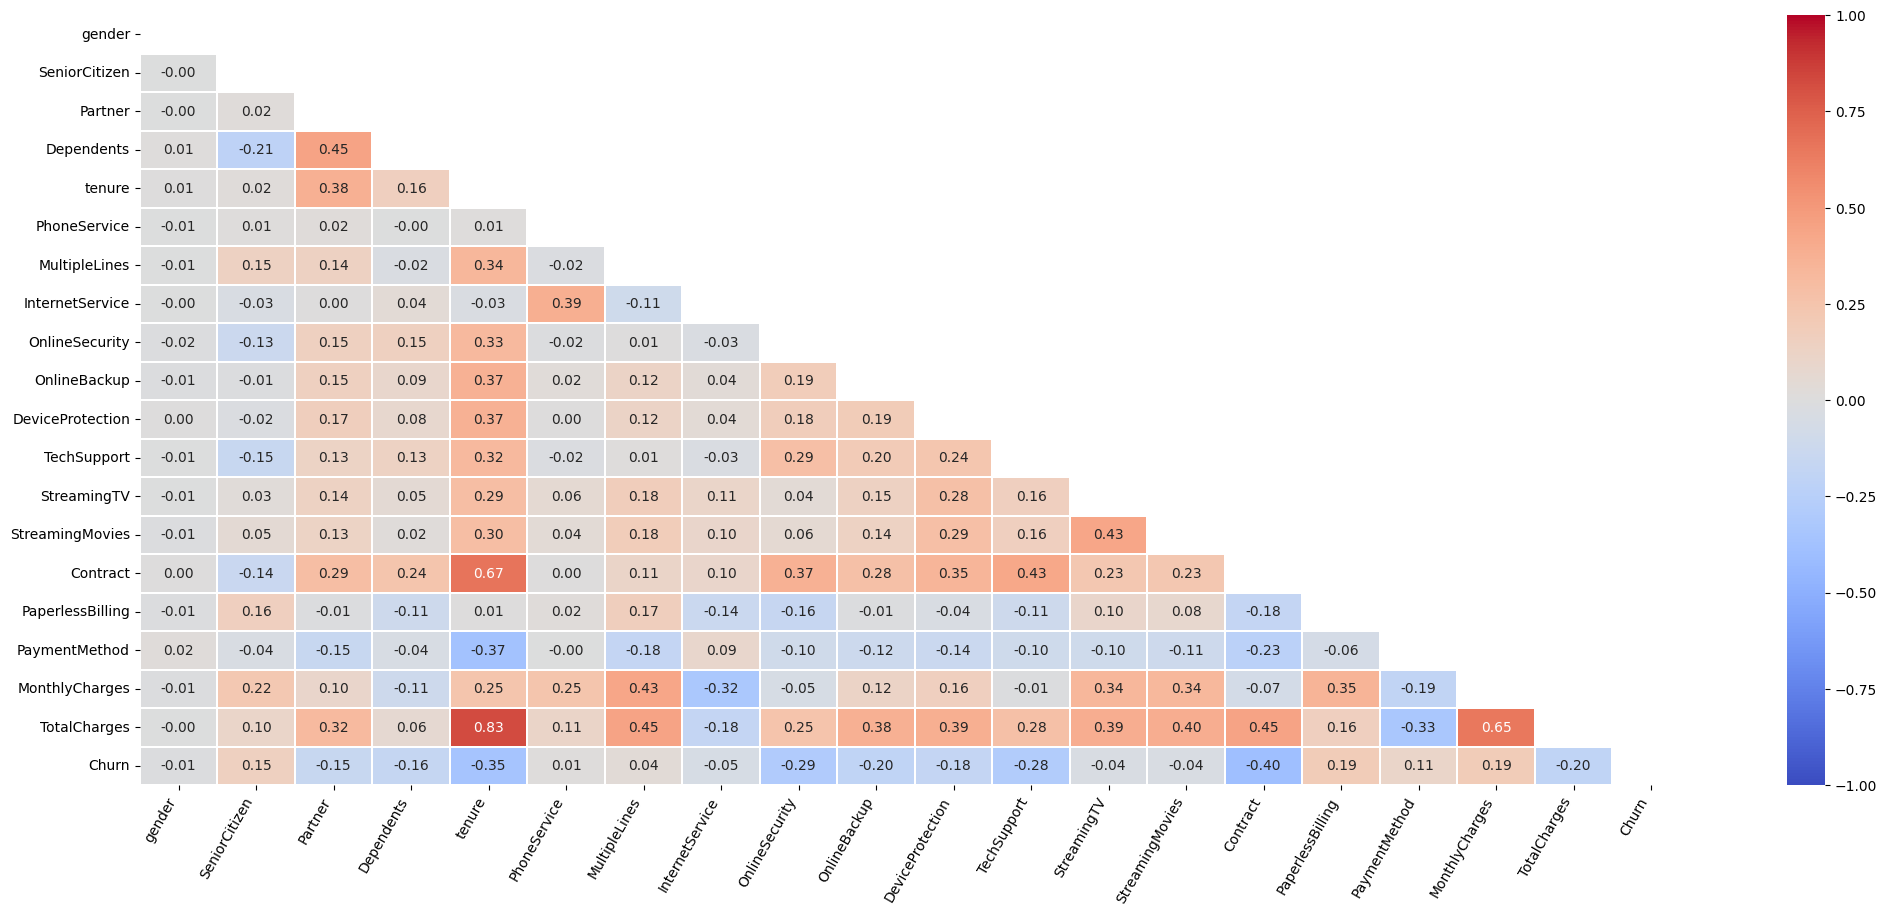

In [31]:
# Plot correlation matrix with heatmap

plt.figure(figsize=(25, 10))

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a mask for the upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

ax = sns.heatmap(
    correlation_matrix,
    mask=mask,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    annot=True,
    fmt='.2f',
    linewidths=0.2,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right'
)

plt.show()

- 「tenure(在籍期間)」と「TotalCharges(総支払額)」、「tenure(在籍期間)」と「Contract(契約形態)」で強い相関を示した
- 「MonthlyCharges(月額料金)」と「TotalCharges(総支払額)」で強い相関を示した

In [32]:
# Sort in descending order correlations between 'Churn' and other features
churn_correlations = df1.corr()['Churn'].sort_values(ascending=False)

churn_correlations

,Churn
Churn,1.00
MonthlyCharges,0.19
PaperlessBilling,0.19
SeniorCitizen,0.15
PaymentMethod,0.11
MultipleLines,0.04
PhoneService,0.01
gender,-0.01
StreamingTV,-0.04
StreamingMovies,-0.04


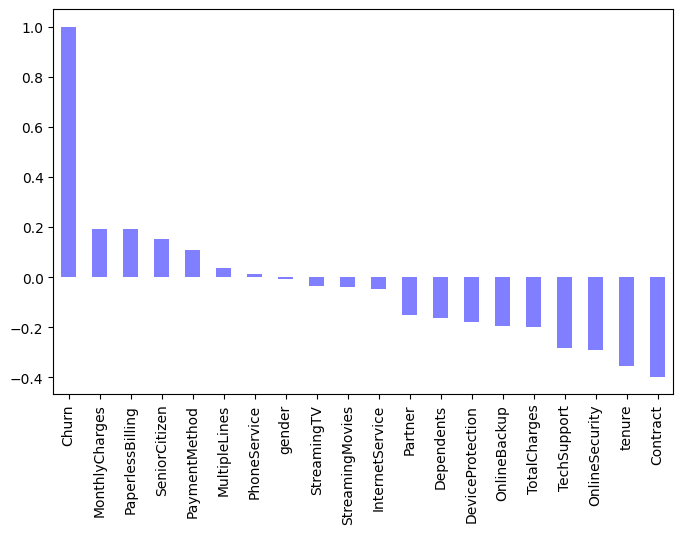

In [33]:
# Look at correlations between 'Churn' and other features

plt.figure(figsize=(8, 5))

churn_correlations.plot(
    kind='bar',
    color='blue',
    alpha=0.5
)

plt.show()

- 「MonthlyCharges(月額料金)」、「PaperlessBilling(ペーパーレス請求の有無)」、「Contract(契約形態)」、「tenure(在籍期間)」、「OnlineSecurity(オンライン・セキュリティの有無)」、「TechSupport(テクニカル・サポートの有無)」、「TotalCharges(総支払額)」、「OnlineBackup(オンライン・バックアップの有無)」などが、「Churn(解約)」と相関が強かった

In [34]:
# Drop features with low correlation

low_correlation_threshold = (-0.1, 0.1)
# List features whose correlation with 'Churn' is between (-0.1, 0.1)
low_correlation_features = churn_correlations[
    (churn_correlations > low_correlation_threshold[0]) &
    (churn_correlations < low_correlation_threshold[1])
].index.tolist()

print(f'Low Correlation Features to Be Removed: {low_correlation_features}')

df1 = df1.drop(columns=low_correlation_features)

df1.head()

Low Correlation Features to Be Removed: ['MultipleLines', 'PhoneService', 'gender', 'StreamingTV', 'StreamingMovies', 'InternetService']


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1


- 「Churn(解約)」と相関の弱い「Multiplelines(複数回線の有無)」、「PhoneService(電話サービスの有無)」、「gender(性別)」、「StreamingTV(ストリーミングTVサービスの有無)」、「StreamingMovies(ストリーミング映画サービスの有無)」、「InternetService(インターネット・サービス・プロバイダー)」の特徴量を削除した

# Split Data

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [36]:
# Split data into target variable and other features

X = df1.drop(columns=['Churn'])
y = df1['Churn']

X.shape, y.shape

((7043, 13), (7043,))

In [37]:
# Split data to 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 13), (1409, 13), (5634,), (1409,))

In [38]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


In [39]:
# Handle data imbalance

smote = SMOTE(sampling_strategy=1, random_state=42)
# Apply to training data only
X_train, y_train = smote.fit_resample(X_train, y_train)

y_train.value_counts()

,count
Churn,
0,4138
1,4138


- データのバランスを取るために、SMOTEを使用し均衡データを作成した。評価に影響が出ないようにするため、学習データのみ解約者データを増やし調整を行った

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8276, 13), (1409, 13), (8276,), (1409,))

# Scaling Numerical Features

In [41]:
# Perform normalization on numerical features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Convert testing data based on scaling criteria for training data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0.29,2,0,2,0,1,0,3,0.46,0.15
1,0,0,0,0.75,0,2,0,0,2,1,0,0.79,0.59
2,0,1,0,0.01,0,0,0,0,0,1,2,0.05,0.00
3,0,0,0,0.06,0,0,0,0,0,1,2,0.52,0.03
4,0,0,1,0.00,2,2,0,2,2,1,0,0.43,0.16


# Model Training

データセットに最も適したアルゴリズムを見つけるため、複数の分類モデルを試行し、精度が最も高いモデルを選択する

分類モデルは、ロジスティック回帰、サポートベクターマシン、決定木、ランダムフォレスト、XGBoost、LightGBMを使用する

モデルの精度を決める評価指標は再現率(Recall)を使用する。解約したユーザーのうち、モデルが正確に特定できたユーザーの数を示す指標である。解約するユーザーを見逃さないようにしたいため、重視すべき指標とする

再現率80%以上を目標精度とする

In [42]:
from dataclasses import dataclass
from typing import Any, Dict, Tuple

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [43]:
@dataclass
class Dataset:
    X_train: pd.DataFrame
    y_train: pd.DataFrame
    X_test: pd.DataFrame
    y_test: pd.DataFrame


@dataclass
class ModelInfo:
    name: str
    model: Any
    param_grid: Dict[str, Any]


def evaluate_model(model_info: ModelInfo, dataset: Dataset) -> Tuple[Dict[str, Any], np.ndarray]:
    """
    Evaluate a machine learning model using GridSearchCV.

    Parameters
    ----------
    model_info : ModelInfo
        Contains model name, model instance, and parameter grid
    dataset : Dataset
        Contains training and testing data

    Returns
    -------
    Tuple[Dict[str, Any], np.ndarray]
        A tuple containing:
        - A dictionary with evaluation metrics and best parameters
        - Predicted labels for the testing dataset
    """
    # To balance the model, use the f1 score as the evaluation metric
    grid_search = GridSearchCV(
        estimator=model_info.model,
        param_grid=model_info.param_grid,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    grid_search.fit(dataset.X_train, dataset.y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(dataset.X_test)
    y_prob = best_model.predict_proba(dataset.X_test)[:, 1]

    metrics = {
        'Model': model_info.name,
        'Best_Params': grid_search.best_params_,
        'Accuracy': accuracy_score(dataset.y_test, y_pred),
        'Precision': precision_score(dataset.y_test, y_pred),
        'Recall': recall_score(dataset.y_test, y_pred),
        'F1_Score': f1_score(dataset.y_test, y_pred),
        'AUC': roc_auc_score(dataset.y_test, y_prob),
        'Best_CV_Score': grid_search.best_score_
    }
    return metrics, y_pred

In [44]:
def plot_confusion_matrix(cm: np.ndarray, model_name: str) -> None:
    """
    Plot a confusion matrix with annotations.

    Parameters
    ----------
    cm : np.ndarray
        The confusion matrix as a 2D array
    model_name : str
        The name of the machine learning model

    Returns
    -------
    None
    """
    # Define label names and prepare annotation data
    label_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = cm.flatten()
    percentages = cm.flatten() / np.sum(cm)
    labels = [
        f'{name}\n{count}\n{percentage:.2%}'
        for name, count, percentage in zip(label_names, counts, percentages)
    ]
    labels = np.array(labels).reshape(2, 2)

    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [45]:
# Set hyperparameters
param_grids = {
    'LR': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'class_weight': ['balanced', None],
        'max_iter': [100, 500, 1000, 8000]
    },
    'SVM': {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced'],
    'gamma': ['scale']
    },
    'DTC': {
        'max_depth': [10, 20, 30, 40, None],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 5, 10, 15],
        'criterion': ['gini', 'entropy']
    },
    'RF': {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'],
    'max_samples': [0.7, None]
    },
    'XGB': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'num_leaves': [31, 50, 100, 150],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

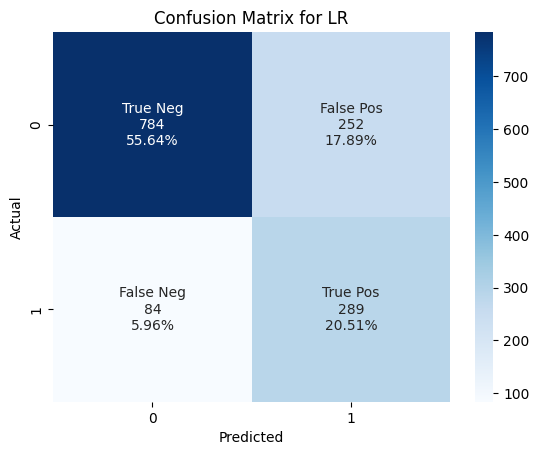

--------------------------------------------------
Model: LR
Time Taken: 0.26 minutes
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

--------------------------------------------------


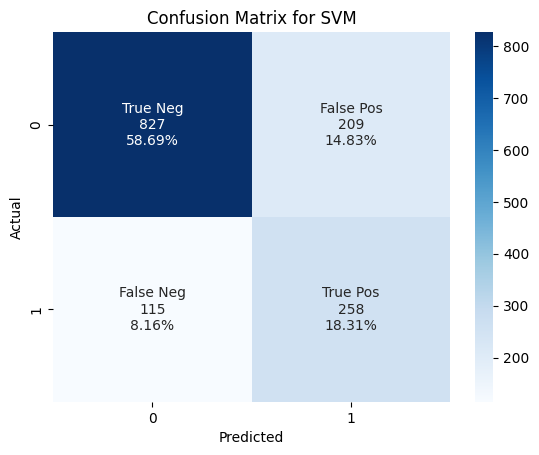

--------------------------------------------------
Model: SVM
Time Taken: 4.71 minutes
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1036
           1       0.55      0.69      0.61       373

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409

--------------------------------------------------


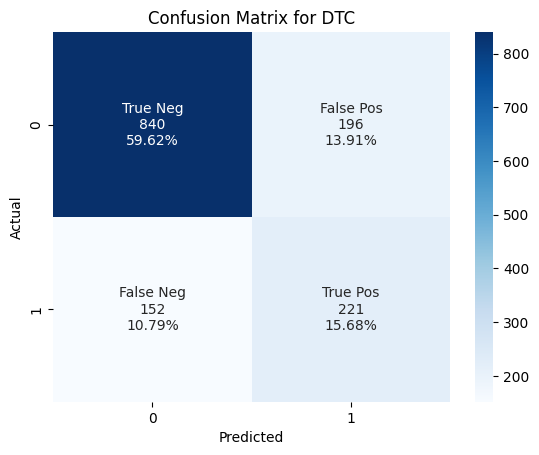

--------------------------------------------------
Model: DTC
Time Taken: 5.27 minutes
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1036
           1       0.53      0.59      0.56       373

    accuracy                           0.75      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.76      0.75      0.76      1409

--------------------------------------------------


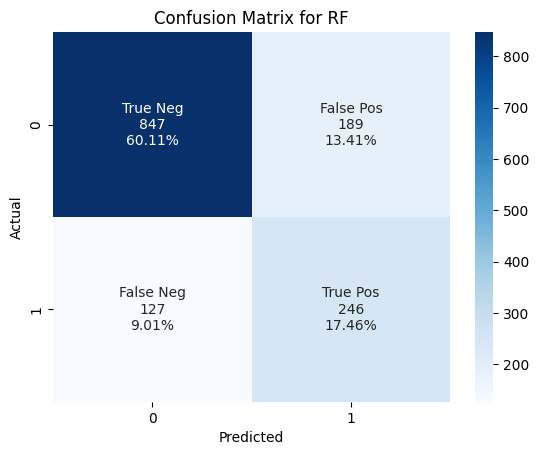

--------------------------------------------------
Model: RF
Time Taken: 13.68 minutes
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.57      0.66      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

--------------------------------------------------


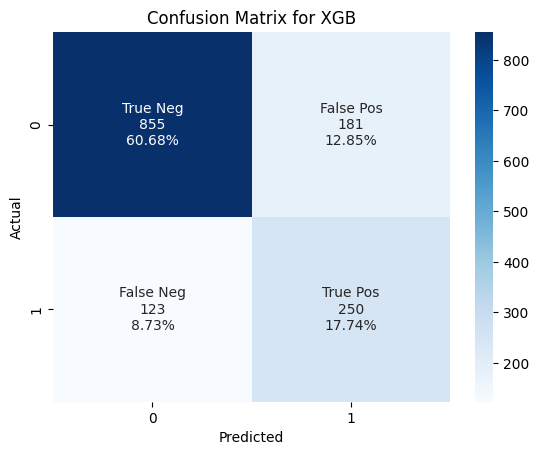

--------------------------------------------------
Model: XGB
Time Taken: 25.09 minutes
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1036
           1       0.58      0.67      0.62       373

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.78      0.79      1409

--------------------------------------------------


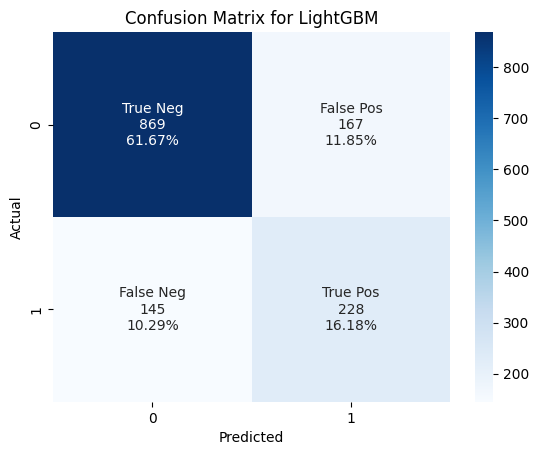

--------------------------------------------------
Model: LightGBM
Time Taken: 41.18 minutes
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.58      0.61      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409

--------------------------------------------------
Total Time Taken: 41.18 minutes


,Model,Accuracy,Precision,Recall,F1_Score,AUC,Best_CV_Score
0,LR,0.76,0.53,0.77,0.63,0.84,0.79
1,SVM,0.77,0.55,0.69,0.61,0.81,0.80
2,XGB,0.78,0.58,0.67,0.62,0.84,0.83
3,RF,0.78,0.57,0.66,0.61,0.84,0.83
4,LightGBM,0.78,0.58,0.61,0.59,0.83,0.83
5,DTC,0.75,0.53,0.59,0.56,0.78,0.81


In [46]:
# Perform grid search and cross-validation

import time

start = time.time()

result = []

# Prepare Dataset instance
dataset = Dataset(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

models = [
    ('LR', LogisticRegression(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('DTC', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('XGB', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1))
]

for model_name, model in models:
    param_grid = param_grids.get(model_name, {})
    # Prepare ModelInfo instance
    model_info = ModelInfo(
        name=model_name,
        model=model,
        param_grid=param_grid
    )

    metrics, y_pred = evaluate_model(model_info, dataset)
    result.append(metrics)

    cm = confusion_matrix(dataset.y_test, y_pred)
    plot_confusion_matrix(cm, model_name)

    print('-' * 50)
    print(f'Model: {model_name}')
    print(f'Time Taken: {(time.time() - start) / 60:.2f} minutes')
    print(classification_report(dataset.y_test, y_pred))
    print('-' * 50)

print(f'Total Time Taken: {(time.time() - start) / 60:.2f} minutes')

result_df = (
    pd.DataFrame(result)
    .sort_values(by='Recall', ascending=False)
    .reset_index(drop=True)
)
result_no_bp = result_df.drop(columns=['Best_Params'])

result_no_bp

In [47]:
best_params = {
    row['Model']: row['Best_Params']
    for _, row in result_df.iterrows()
}

for model, params in best_params.items():
    print(f'Model: {model}')
    print(f'Best Params: {params}')

Model: LR
Best Params: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'liblinear'}
Model: SVM
Best Params: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Model: XGB
Best Params: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 1.0}
Model: RF
Best Params: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Model: LightGBM
Best Params: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'n_estimators': 300, 'num_leaves': 100, 'subsample': 0.6}
Model: DTC
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [48]:
def calculate_metrics(
    model: Any,
    X_test: pd.DataFrame,
    y_test: pd.DataFrame,
    threshold: float = 0.5
) -> Tuple[Dict[str, float], np.ndarray, np.ndarray]:
    """
    Calculate evaluation metrics for a classification model.

    Parameters
    ----------
    model : Any
        The trained classification model
    X_test : pd.DataFrame
        Testing data features
    y_test : pd.DataFrame
        Testing data target variable
    threshold : float, optional
        The Threshold for predicted probability, by default 0.5

    Returns
    -------
    Tuple[Dict[str, float], np.ndarray, np.ndarray]
        A tuple containing:
        - A dictionary with evaluation metrics
        - Predicted probabilities for the positive class
        - Predicted labels based on the threshold
    """
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1_Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }
    return metrics, y_prob, y_pred

def plot_roc_curve(
    y_test: pd.DataFrame,
    y_prob: np.ndarray,
    model_name: str
) -> None:
    """
    Plot the ROC curve.

    Parameters
    ----------
    y_test : pd.DataFrame
        Testing data target variable
    y_prob : np.ndarray
        Predicted probabilities for the positive class
    model_name : str
        The name of the machine learning model

    Returns
    -------
    None
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', alpha=0.7)
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

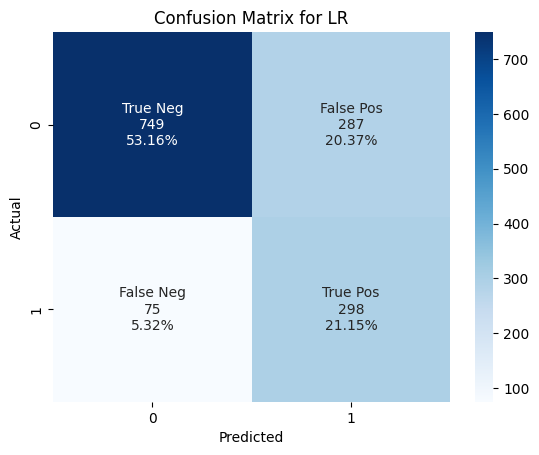

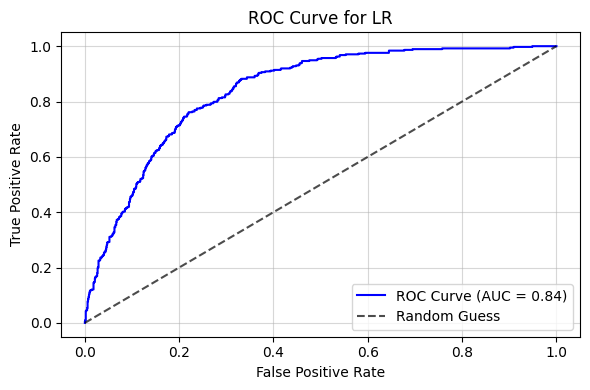

--------------------------------------------------
Model: LR
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1036
           1       0.51      0.80      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

--------------------------------------------------


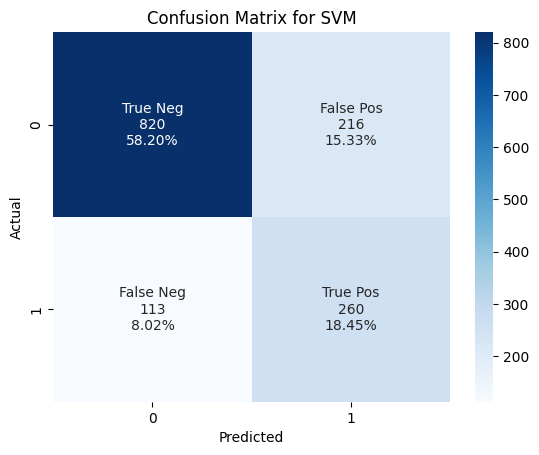

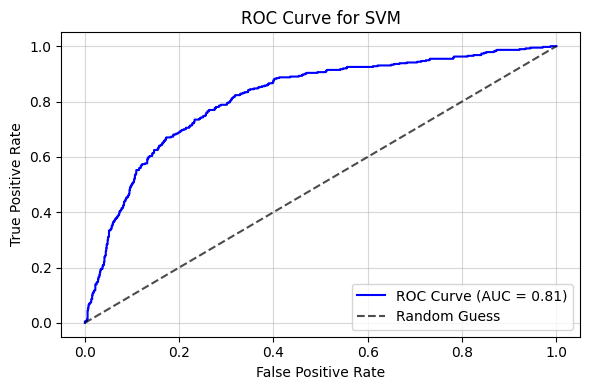

--------------------------------------------------
Model: SVM
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1036
           1       0.55      0.70      0.61       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409

--------------------------------------------------


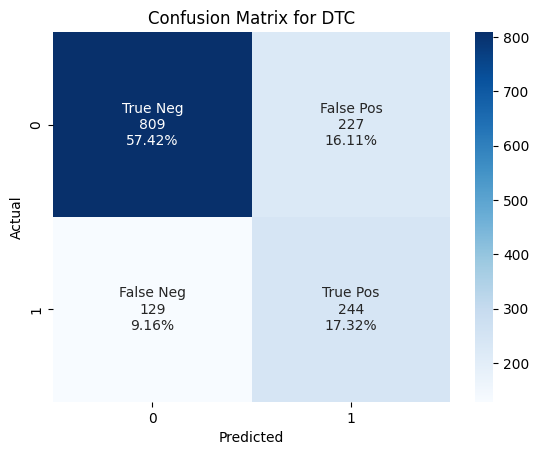

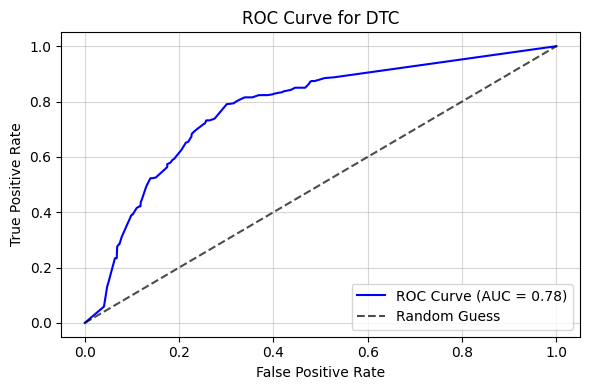

--------------------------------------------------
Model: DTC
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1036
           1       0.52      0.65      0.58       373

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409

--------------------------------------------------


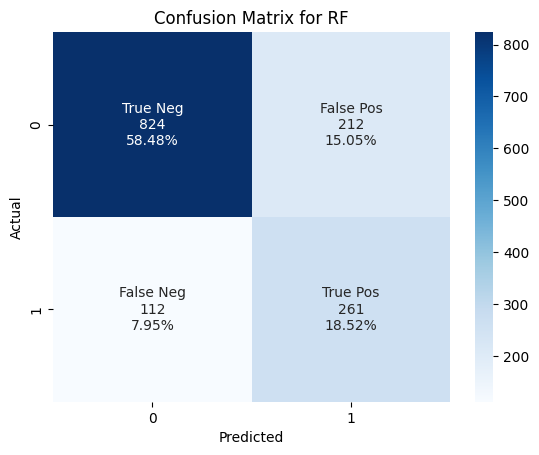

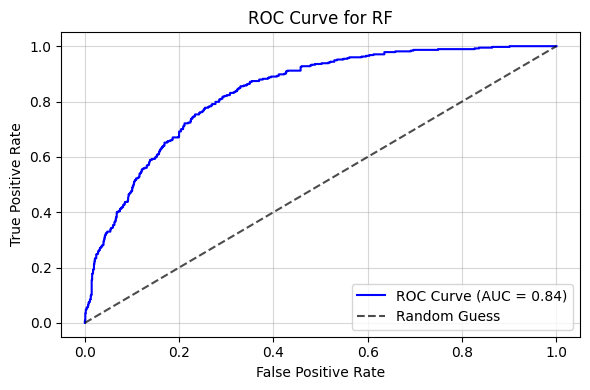

--------------------------------------------------
Model: RF
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1036
           1       0.55      0.70      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

--------------------------------------------------


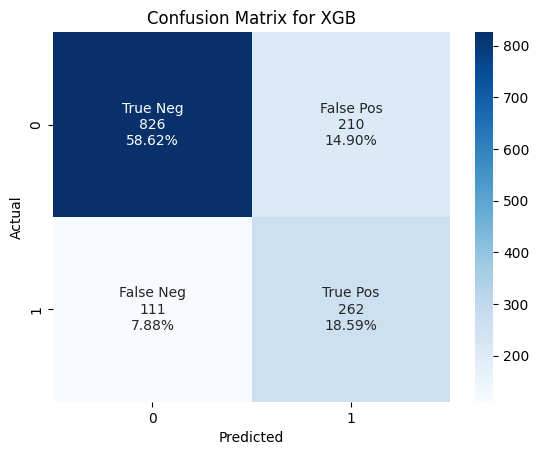

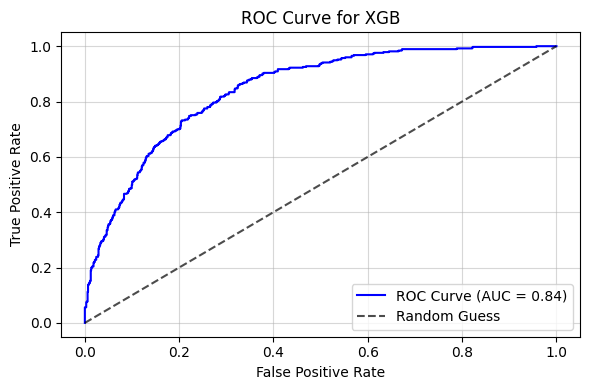

--------------------------------------------------
Model: XGB
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1036
           1       0.56      0.70      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409

--------------------------------------------------


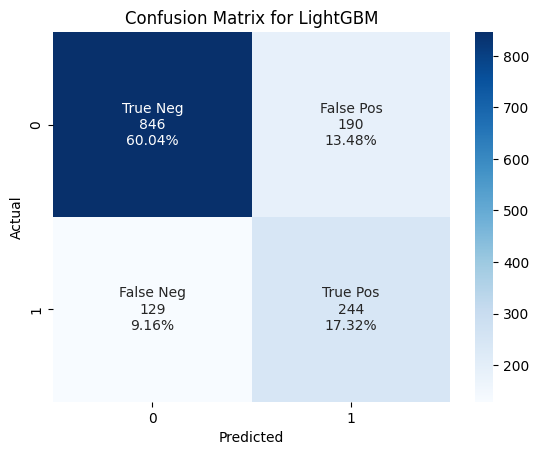

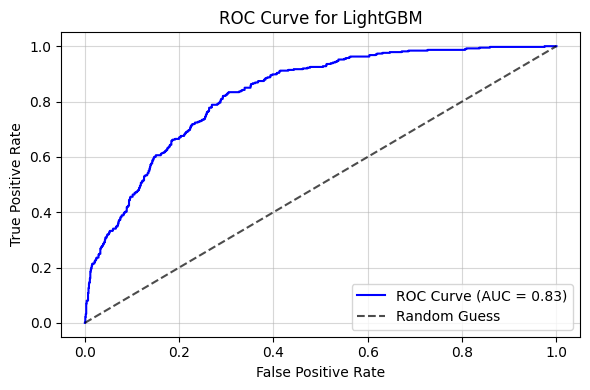

--------------------------------------------------
Model: LightGBM
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.56      0.65      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

--------------------------------------------------
Total Time Taken: 0.39 minutes


,Model,Accuracy,Precision,Recall,F1_Score,AUC
0,ロジスティック回帰,0.74,0.51,0.80,0.62,0.84
1,XGBoost,0.77,0.56,0.70,0.62,0.84
2,ランダムフォレスト,0.77,0.55,0.70,0.62,0.84
3,サポートベクターマシン,0.77,0.55,0.70,0.61,0.81
4,決定木,0.75,0.52,0.65,0.58,0.78
5,LightGBM,0.77,0.56,0.65,0.60,0.83


In [49]:
# Train the final model with the best parameters

start = time.time()

models = [
    ('LR', LogisticRegression(**best_params['LR'], random_state=42), 'ロジスティック回帰'),
    ('SVM', SVC(**best_params['SVM'], probability=True, random_state=42), 'サポートベクターマシン'),
    ('DTC', DecisionTreeClassifier(**best_params['DTC'], random_state=42), '決定木'),
    ('RF', RandomForestClassifier(**best_params['RF'], random_state=42), 'ランダムフォレスト'),
    ('XGB', XGBClassifier(**best_params['XGB'], random_state=42), 'XGBoost'),
    ('LightGBM', LGBMClassifier(**best_params['LightGBM'], random_state=42, force_row_wise=True, verbose=-1), 'LightGBM')
]

result = []

for model_name, model, model_display_name in models:
    model.fit(X_train, y_train)

    # Adjust the threshold to improve recall
    metrics, y_prob, y_pred = calculate_metrics(model, X_test, y_test, threshold=0.46)
    metrics['Model'] = model_display_name
    result.append(metrics)

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)
    plot_roc_curve(y_test, y_prob, model_name)

    print('-' * 50)
    print(f'Model: {model_name}')
    print(classification_report(y_test, y_pred))
    print('-' * 50)

print(f'Total Time Taken: {(time.time() - start) / 60:.2f} minutes')

result_df = (
    pd.DataFrame(result)
    .sort_values(by='Recall', ascending=False)
    .reset_index(drop=True)
)
result_df = result_df[['Model'] + [col for col in result_df.columns if col != 'Model']]

result_df

- 評価指標である再現率(Recall)を上げるために、予測確率に対する閾値を調整した。ロジスティック回帰の再現率が目標精度の80%以上に達したため、他のアプローチは試さず、モデルの解釈に進む

# Model Interpretation

ロジスティック回帰を分析し、予測に対して影響度の大きい特徴量を抽出する。その特徴量をもとに施策提示を行う

精度の高いモデルに影響を与えている特徴量は重要と考える。モデルが解約すると予測したユーザーに対して施策を実施する場合、より効果的である

モデルの解釈手法はSHAP(SHapley Additive exPlanations)を使用する

SHAPは、既存の解釈手法を統一し、理論的に堅牢で直感的な説明を提供する手法である。モデルに依存せず、どの機械学習モデルにも適用可能で、一貫性のある特徴重要度を計算できるため採用した

In [50]:
# Prepare the final model

model_lr = LogisticRegression(**best_params['LR'], random_state=42)
model_lr.fit(X_train, y_train)

# Set the threshold for predictions
threshold = 0.46

y_prob = model_lr.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1036
           1       0.51      0.80      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



SHAPの計算にはスケーリング後のデータを使用する。モデルがスケーリング後のデータで学習しているため、スケーリング後のデータを使うことで、モデルと一貫した形で特徴量の影響を評価できるためである

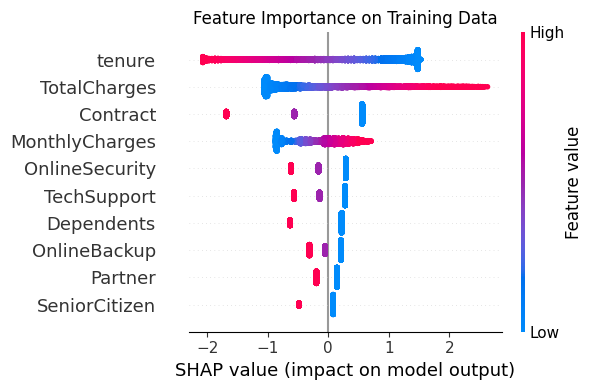

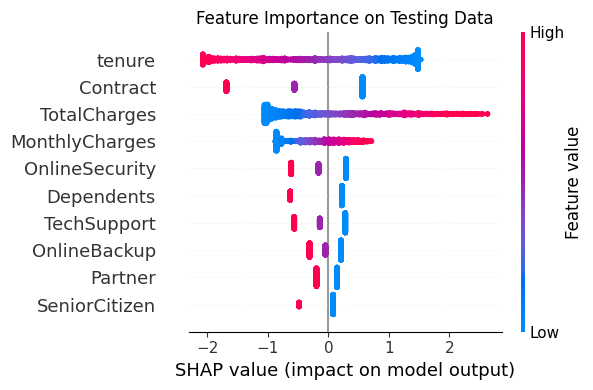

In [51]:
# Interpret models using SHAP

import shap

shap.initjs()

# Create the object that can calculate SHAP values
explainer = shap.LinearExplainer(
    model_lr,
    X_train,
    feature_perturbation='interventional'
)

# Calculate SHAP values for training and testing data
shap_values = {
    'train': explainer.shap_values(X_train),
    'test': explainer.shap_values(X_test)
}

plt.title('Feature Importance on Training Data')
shap.summary_plot(shap_values['train'], X_train, max_display=10, plot_size=(6, 4))

plt.title('Feature Importance on Testing Data')
shap.summary_plot(shap_values['test'], X_test, max_display=10, plot_size=(6, 4))

- 学習データとテストデータの両方で特徴量の重要度を確認した。「Contract(契約形態)」と「TotalCharges(総支払額)」、「TechSupport(テクニカル・サポートの有無)」と「Dependents(扶養家族の有無)」の位置が入れ替わってはいるが、ほぼ同じ結果となった
- 特に影響の大きい上位8つの特徴量を抽出した。これらの特徴量から施策を考える
    1. tenure(在籍期間): 在籍期間が短いと解約する可能性が高い
    2. Contract(契約形態): 月単位の契約だと解約する可能性が高い
    3. TotalCharges(総支払額): 総支払額が多いと解約する可能性が高い
    4. MonthlyCharges(月額料金): 月額料金が高いと解約する可能性が高い
    5. OnlineSecuriy(オンライン・セキュリティの有無): オンライン・セキュリティに加入していないと解約する可能性が高い(インターネットサービスには加入済み)
    6. Dependents(扶養家族の有無): 扶養家族がいないと解約する可能性が高い
    7. TechSupport(テクニカル・サポートの有無): テクニカル・サポートに加入していないと解約する可能性が高い(インターネットサービスには加入済み)
    8. OnlineBackup(オンライン・バックアップの有無): オンライン・バックアップに加入していないと解約する可能性が高い(インターネットサービスには加入済み)